In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import utils

from scipy.ndimage.measurements import center_of_mass
from skimage import measure
from math import pi

In [61]:
num_of_classes = 6
images_count = 800
input_images, target_masks = utils.generate_random_data(192, 192, count=images_count)

classes = {
    0: 'square',
    1: 'circle',
    2: 'triangle',
    3: 'donut',
    4: 'hollow square',
    5: 'plus'
}

colors = {
    0: 'cyan',
    1: 'blue',
    2: 'greenyellow',
    3: 'red',
    4: 'yellow',
    5: 'green'
}
classes_list = [classes[i] for i in range(num_of_classes)]

### Computing areas for different shape types

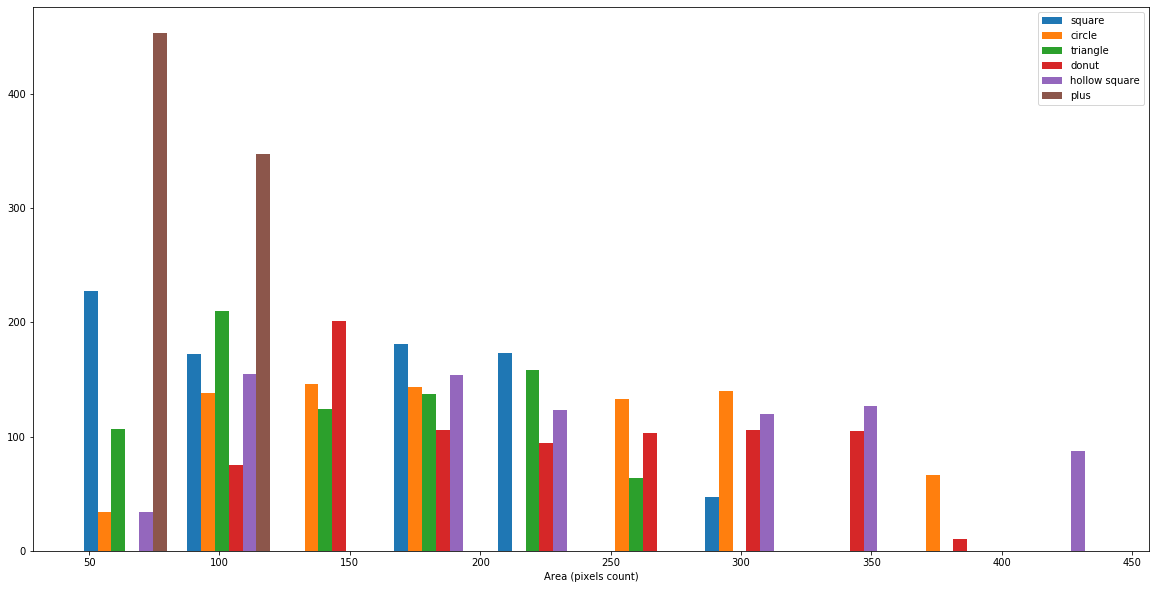

In [76]:
areas = target_masks.sum(axis=2).sum(axis=2)
plt.figure(figsize=(20,10))
plt.hist(areas, label=classes_list) 
plt.xlabel('Area (pixels count)')
plt.legend()
plt.show()

### Computing centers of mass and compactness

Compactness is defined as the ratio of the area of an object to the area of a circle with the same perimeter.

In [63]:
#centers of mass of different shapes
centers_x = {}
centers_y = {}

#compactnes of different shapes
compactness = {}

for i in range(num_of_classes):
    for j in range(images_count):
        if i in centers_x:
            c_o_m = center_of_mass(target_masks[j, i, :, :])
            centers_x[i].append(c_o_m[0])
            centers_y[i].append(c_o_m[1])
            
            properties = measure.regionprops(np.asarray(target_masks[j,i,:,:], dtype='int'))
            p = [prop for prop in properties][0]
            compactness[i].append(4*pi*p.area/p.perimeter**2)
        else:                       
            c_o_m = center_of_mass(target_masks[j, i, :, :])
            centers_x[i] = [c_o_m[0]]
            centers_y[i] = [c_o_m[1]]
            
            properties = measure.regionprops(np.asarray(target_masks[j,i,:,:], dtype='int'))
            p = [prop for prop in properties][0]
            compactness[i] = [4*pi*p.area/p.perimeter**2]

### Compactness histograms

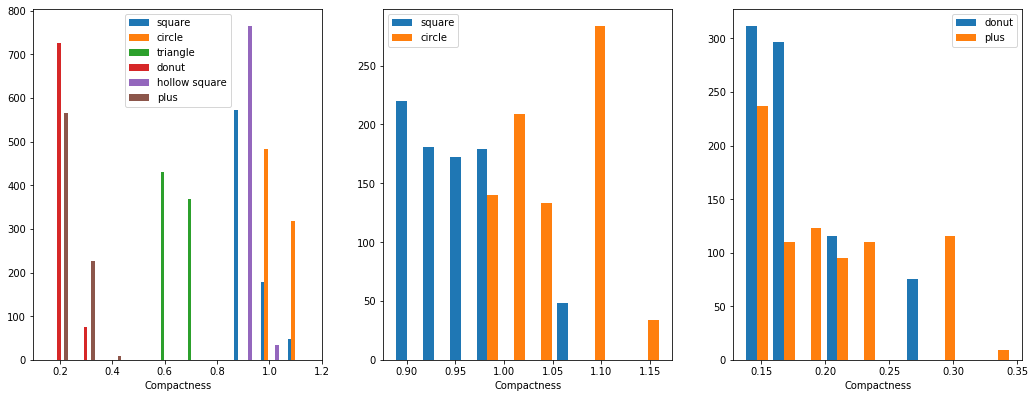

In [64]:
needed_indexes = [0,1,2,3,4,5]
compactnesses = [compactness[i] for i in needed_indexes]
labels = [classes_list[i] for i in needed_indexes]
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.tight_layout(pad=3.0)

axs[0].hist(compactnesses, label=labels)
axs[0].set_xlabel('Compactness')
axs[0].legend()

needed_indexes = [0,1]
compactnesses = [compactness[i] for i in needed_indexes]
labels = [classes_list[i] for i in needed_indexes]

axs[1].hist(compactnesses, label=labels)
axs[1].set_xlabel('Compactness')
axs[1].legend()

needed_indexes = [3,5]

compactnesses = [compactness[i] for i in needed_indexes]
labels = [classes_list[i] for i in needed_indexes]

axs[2].hist(compactnesses, label=labels)
axs[2].set_xlabel('Compactness')
axs[2].legend()

plt.show()

### Centers of shapes distributions

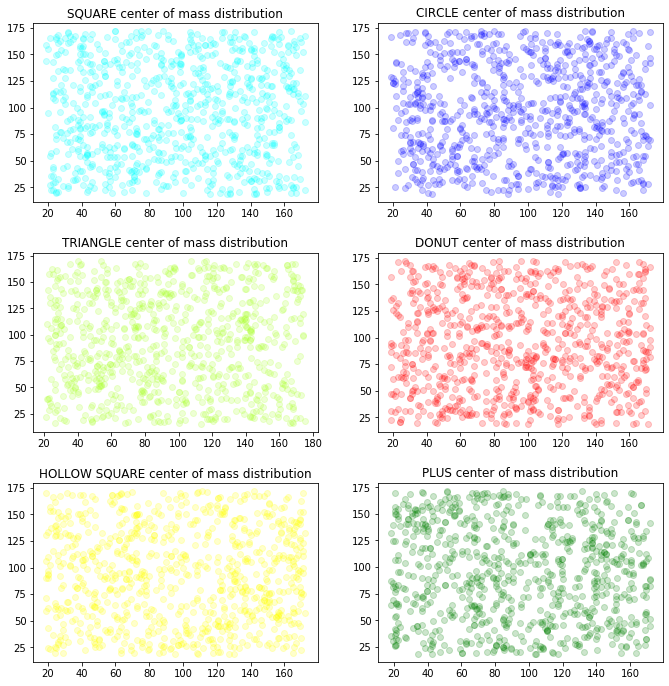

In [65]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
fig.tight_layout(pad=3.0)

for key in classes:
    axs[key//2, key%2].scatter(centers_x[key], centers_y[key], c=colors[key], alpha=0.2)
    axs[key//2, key%2].set_title('{} center of mass distribution'.format(classes[key].upper()))

plt.show()

### Computing distances between shapes 

In [66]:
distances = {}

for i in range(num_of_classes):
    for j in range(i + 1, num_of_classes):
        key = (i, j)
        dis_x = (np.asarray(centers_x[i]) - np.asarray(centers_x[j]))**2    
        dis_y = (np.asarray(centers_y[i]) - np.asarray(centers_y[j]))**2
        distanse = np.sqrt(dis_x + dis_y).tolist()
        distances[key] = distanse
        

### Distances between shapes distributions

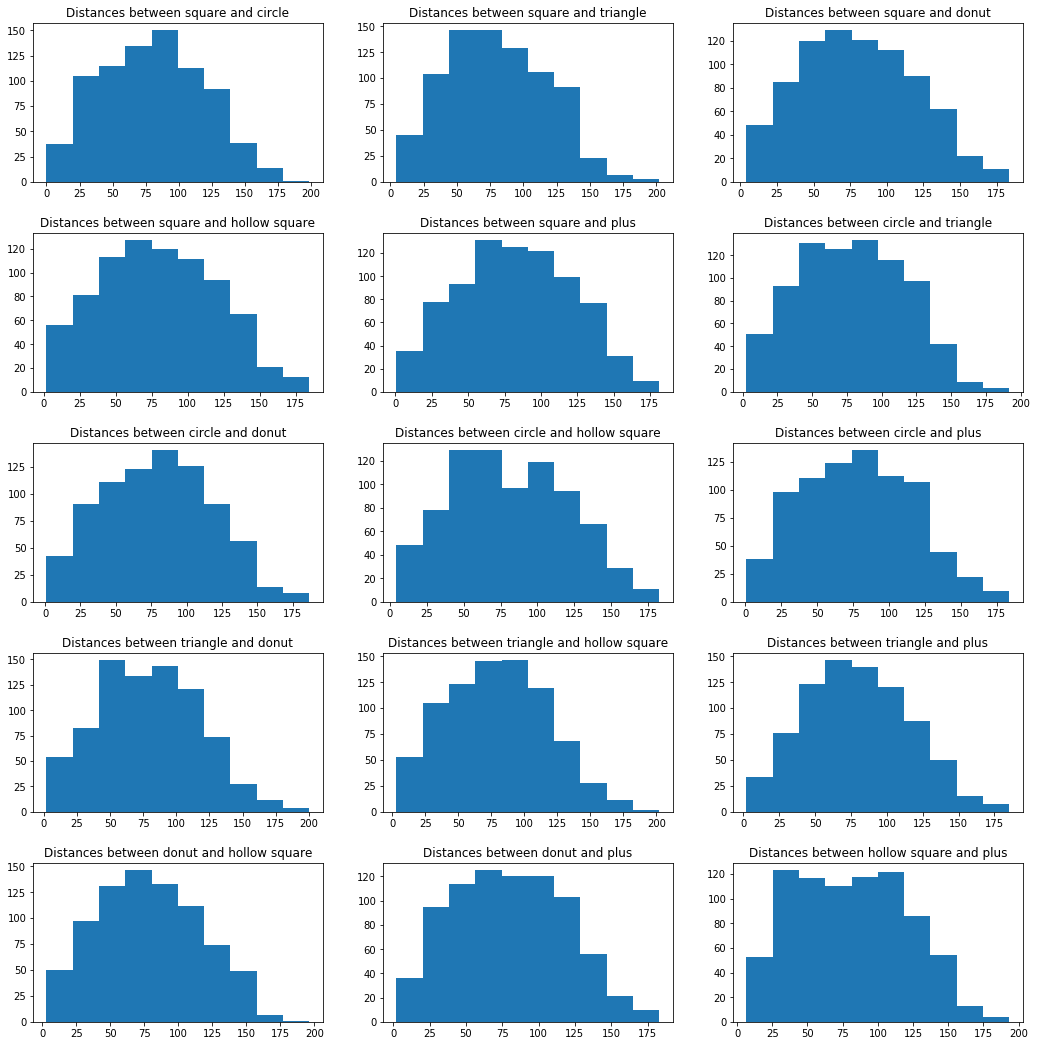

In [67]:
fig, axs = plt.subplots(5, 3, figsize=(15,15))
fig.tight_layout(pad=3.0)
counter = 0
for key in distances:
    axs[counter//3, counter%3].hist(distances[key])
    axs[counter//3, counter%3].set_title('Distances between {} and {}'.format(classes[key[0]], classes[key[1]]))
    counter += 1
plt.show()